In [4]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
from multiprocessing import Pool
import glob

In [2]:
output_location = "E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.shp"

In [5]:
for file in glob.glob(output_location.replace(".","_part_*.")):
    print(file)

E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_0.shp
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_1.shp
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_2.shp


In [7]:
first_check = 0
for file in glob.glob(output_location.replace(".","_part_*.")):
                        print(file)
                        if first_check == 0:
                            all_part = gpd.read_file(file)
                            first_check = 1
                        else:
                            print("Append")
                            all_part = all_part.append(gpd.read_file(file))

E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_0.shp
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_part_2.shp
Append


In [8]:
all_part.dissolve(by='label').to_file(output_location)

In [2]:
gras_hoog = 88344.58,470583.41
bos = 88400.32,470192.25
zand_hoog = 88201.79,470359.72
gras_laag = 88069.32,470126.55
zand_laag = 87639.78, 469946.24

In [3]:
def func_cor_square(input_x_y):

        rect = [round(input_x_y[0]/2)*2, round(input_x_y[1]/2)*2, 0, 0]
        rect[2], rect[3] = rect[0] + 2, rect[1] + 2
        coords = Polygon([(rect[0], rect[1]), (rect[2], rect[1]), (rect[2], rect[3]), (rect[0], rect[3]), (rect[0], rect[1])])
        return coords

In [24]:
class_cor_0 = [gras_hoog[0],bos[0] ,zand_hoog[0], gras_laag[0], zand_laag[0] ]
class_cor_1 = [gras_hoog[0],bos[1] ,zand_hoog[1], gras_laag[1], zand_laag[1] ]

In [25]:
class_name = ["gras_hoog","bos","zand_hoog","gras_laag","zand_laag"]

In [26]:
df = pd.DataFrame([class_cor_0,class_cor_1,class_name]).T

In [27]:
df

,0,1,2
0,88344.58,88344.58,gras_hoog
1,88400.32,470192.25,bos
2,88201.79,470359.72,zand_hoog
3,88069.32,470126.55,gras_laag
4,87639.78,469946.24,zand_laag


In [9]:
p = Pool()

In [ ]:
p.map(func_cor_square, df[[0,1]].to_numpy())

In [21]:
df['both'] = df[[0,1]].to_numpy()[0]

ValueError: Length of values (2) does not match length of index (5)

In [7]:
df.swifter.apply(lambda x:print(x[0]))

0    (88344.58, 470583.41)
1    (88400.32, 470192.25)
2    (88201.79, 470359.72)
3    (88069.32, 470126.55)
4    (87639.78, 469946.24)
Name: 0, dtype: object


TypeError: <lambda>() got an unexpected keyword argument 'broadcast'

In [67]:
df[0]

0    (88344.58, 470583.41)
1    (88400.32, 470192.25)
2    (88201.79, 470359.72)
3    (88069.32, 470126.55)
4    (87639.78, 469946.24)
Name: 0, dtype: object

In [32]:
aarray = []
for i, seg in enumerate(class_cor):
        rect = [round(seg[0]/2)*2, round(seg[1]/2)*2, 0, 0]
        rect[2], rect[3] = rect[0] + 2, rect[1] + 2
        coords = Polygon([(rect[0], rect[1]), (rect[2], rect[1]), (rect[2], rect[3]), (rect[0], rect[3]), (rect[0], rect[1])])
        aarray.append([class_name[i],coords ])

In [33]:
df = pd.DataFrame(aarray, columns = ['label',"geometry"])

In [34]:
df = gpd.GeoDataFrame(df,crs="EPSG:28992")

In [35]:
df.set_geometry(df.geometry)

,label,geometry
0,gras_hoog,"POLYGON ((88344.000 470584.000, 88346.000 4705..."
1,bos,"POLYGON ((88400.000 470192.000, 88402.000 4701..."
2,zand_hoog,"POLYGON ((88202.000 470360.000, 88204.000 4703..."
3,gras_laag,"POLYGON ((88070.000 470126.000, 88072.000 4701..."
4,zand_laag,"POLYGON ((87640.000 469946.000, 87642.000 4699..."


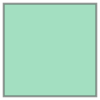

In [45]:
df[1:2]['geometry'][1]

# Annotations

In [1]:
import nso_ds_classes.nso_tif_kernel as nso_tif_kernel
import nso_ds_classes.nso_ds_models as nso_ds_models
import glob
import geopandas as gpd
import os
import pandas as pd
import numpy as np
from timeit import default_timer as timer

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
path_to_csv = "C:/repos/satellite-images-nso-datascience/annotations/coepelduynen_annotations.csv"

In [4]:
path_to_tif = "E:/data/coepelduynen/20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped.tif"

In [5]:
path_to_tif

'E:/data/coepelduynen/20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped.tif'

In [6]:
annotations = pd.read_csv(path_to_csv)

In [7]:
annotations

,label,x_cor,y_cor,date,WGS84
0,gras_hoog,88344.58,470583.41,baseline,NaN
1,bos,88400.32,470192.25,baseline,NaN
2,zand_hoog,88201.79,470359.72,baseline,NaN
3,gras_laag,88069.32,470126.55,baseline,NaN
4,zand_laag,87639.78,469946.24,baseline,NaN
5,gras_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4048832,52.2144157"
6,bos,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4127971,52.2147247"
7,zand_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4119979,52.2200167"
8,gras_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4059545,52.2166766"
9,zand_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4139749,52.2199780"


In [8]:
annotations = annotations[annotations['date'] == "20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped.tif"]

In [9]:
annotations[['wgs84_e', 'wgs84_n']] = annotations['WGS84'].dropna().str.split(",",expand=True,)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
annotations

,label,x_cor,y_cor,date,WGS84,wgs84_e,wgs84_n
5,gras_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4048832,52.2144157",4.4048832,52.2144157
6,bos,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4127971,52.2147247",4.4127971,52.2147247
7,zand_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4119979,52.2200167",4.4119979,52.2200167
8,gras_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4043202,52.2127895",4.4043202,52.2127895
9,zand_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4059672,52.2158659",4.4059672,52.2158659


In [10]:
gdf = gpd.GeoDataFrame(annotations, geometry=gpd.points_from_xy(annotations.wgs84_e,annotations.wgs84_n))

In [11]:
gdf = gdf.set_crs(epsg=4326)

In [12]:
gdf = gdf.to_crs(epsg=28992)

In [13]:
gdf['rd_x'] = gdf['geometry'].x

In [14]:
gdf['rd_y']  = gdf['geometry'].y

In [15]:
gdf

,label,x_cor,y_cor,date,WGS84,wgs84_e,wgs84_n,geometry,rd_x,rd_y
5,gras_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4048832,52.2144157",4.4048832,52.2144157,POINT (87866.388 470045.975),87866.388014,470045.975414
6,bos,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4127971,52.2147247",4.4127971,52.2147247,POINT (88407.678 470073.058),88407.677686,470073.058113
7,zand_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4119979,52.2200167",4.4119979,52.2200167,POINT (88360.978 470662.551),88360.977508,470662.551188
8,gras_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4043202,52.2127895",4.4043202,52.2127895,POINT (87825.462 469865.575),87825.461566,469865.574786
9,zand_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4059672,52.2158659",4.4059672,52.2158659,POINT (87942.650 470206.314),87942.650083,470206.313861


In [16]:
# Set a kernel generator.
x_kernel_width = 32
y_kernel_height = 32



tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_generator(path_to_tif, x_kernel_width , y_kernel_height)

In [17]:
gdf[["rd_x", "rd_y"]] = gdf.apply(lambda x: tif_kernel_generator.get_x_y(x['rd_x'], x['rd_y'] ),axis=1)

In [18]:
gdf

,label,x_cor,y_cor,date,WGS84,wgs84_e,wgs84_n,geometry,rd_x,rd_y
5,gras_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4048832,52.2144157",4.4048832,52.2144157,POINT (87866.388 470045.975),5106,715
6,bos,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4127971,52.2147247",4.4127971,52.2147247,POINT (88407.678 470073.058),5051,1798
7,zand_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4119979,52.2200167",4.4119979,52.2200167,POINT (88360.978 470662.551),3872,1704
8,gras_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4043202,52.2127895",4.4043202,52.2127895,POINT (87825.462 469865.575),5466,633
9,zand_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4059672,52.2158659",4.4059672,52.2158659,POINT (87942.650 470206.314),4785,868


In [19]:
gdf['kernel'] = gdf.apply(lambda x: tif_kernel_generator.get_kernel_for_x_y(x['rd_x'],x['rd_y']), axis=1)

In [4]:
import nso_ds_classes.nso_tif_kernel as nso_tif_kernel
import nso_ds_classes.nso_ds_models as nso_ds_models
x_kernel_width = 32
y_kernel_height = 32


path_to_tif_file = "E:/data/coepelduynen/20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped.tif"
tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_generator(path_to_tif_file, x_kernel_width , y_kernel_height)
tif_kernel_generator.set_fade_kernel()
euclidean_distance_model = nso_ds_models.euclidean_distance_model(tif_kernel_generator)

In [2]:
euclidean_distance_model.set_ec_distance_custom_annotations(path_to_tif_file.split("/")[-1], fade = True)

In [12]:
euclidean_distance_model.get_annotations()

,index,label,x_cor,y_cor,date,WGS84,wgs84_e,wgs84_n,geometry,rd_x,rd_y,kernel
0,5,gras_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4048832,52.2144157",4.4048832,52.2144157,POINT (87866.388 470045.975),5106,715,"[[[263, 258, 254, 256, 260, 258, 263, 259, 259..."
1,6,bos,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4127971,52.2147247",4.4127971,52.2147247,POINT (88407.678 470073.058),5051,1798,"[[[242, 248, 243, 237, 234, 234, 239, 234, 234..."
2,7,zand_hoog,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4119979,52.2200167",4.4119979,52.2200167,POINT (88360.978 470662.551),3872,1704,"[[[350, 355, 350, 352, 340, 332, 348, 349, 351..."
3,8,gras_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4043202,52.2127895",4.4043202,52.2127895,POINT (87825.462 469865.575),5466,633,"[[[297, 301, 296, 304, 308, 291, 283, 281, 282..."
4,9,zand_laag,NaN,NaN,20211226_103526_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4059672,52.2158659",4.4059672,52.2158659,POINT (87942.650 470206.314),4785,868,"[[[296, 283, 275, 283, 288, 286, 285, 286, 279..."


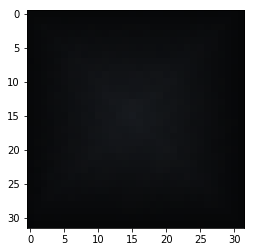

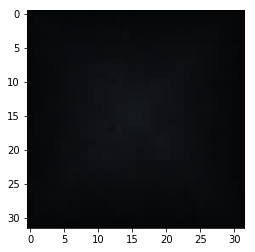

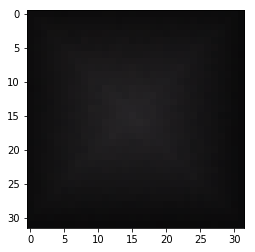

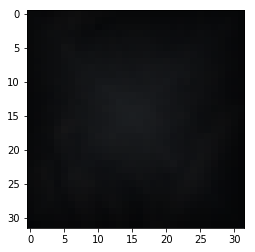

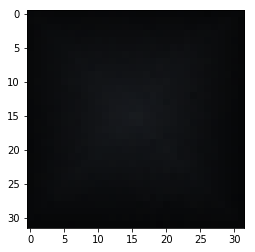

0    None
1    None
2    None
3    None
4    None
dtype: object

In [3]:
euclidean_distance_model.get_annotations().apply(lambda x:nso_tif_kernel.plot_kernel(x['kernel']), axis=1)